# Apply and Visualize UMAP

**Gregory Way, 2019**

We are interested in visualizing the relationship among samples according to several variables.
These variables include `batch`, `dosage`, and `cell line`.

In [1]:
import os
import numpy as np
import pandas as pd
import umap

import plotnine as gg

from pycytominer import feature_select
from pycytominer.cyto_utils import infer_cp_features

In [2]:
%matplotlib inline

In [3]:
np.random.seed(123)

In [4]:
def process_umap(data_df):    
    # Prepare UMAP input by removing metadata columns
    metadata_cols = infer_cp_features(data_df, metadata=True)

    metadata_df = data_df.loc[:, metadata_cols]
    umap_data_df = data_df.drop(metadata_cols, axis="columns")
    
    # Apply UMAP
    reducer = umap.UMAP(random_state=123)
    embedding = reducer.fit_transform(umap_data_df)
    
    # Setup plotting logic
    embedding_df = pd.DataFrame(embedding, columns=['x', 'y'])
    embedding_df = embedding_df.merge(metadata_df, left_index=True, right_index=True)
    
    return embedding_df

In [5]:
save_file_extensions = ['.png']
data_dir = os.path.join("data", "merged")

# Three example datasets
dataset_a = ["2019_02_15_Batch1_20X", "2019_03_20_Batch2"]
dataset_b = ["2019_11_19_Batch5", "2019_11_20_Batch6", "2019_11_22_Batch7"]
dataset_c = ["2021_03_03_Batch12", "2021_03_03_Batch13", "2021_03_05_Batch16"]
dataset_d = [
    "2021_03_03_Batch12",
    "2021_03_03_Batch13",
    "2021_03_03_Batch14",
    "2021_03_03_Batch15",
    "2021_03_05_Batch16"
]

In [6]:
# Load and process data
file = os.path.join(data_dir, "all_merged_profiles.csv.gz")
data_df = pd.read_csv(file, low_memory=False)

print(data_df.shape)
data_df.head()

(3957, 458)


,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,...,Nuclei_Texture_Correlation_RNA_20_00,Nuclei_Texture_Correlation_RNA_20_02,Nuclei_Texture_Entropy_DNA_20_03,Nuclei_Texture_Entropy_ER_20_03,Nuclei_Texture_InfoMeas1_DNA_5_02,Nuclei_Texture_InfoMeas1_ER_5_00,Nuclei_Texture_InfoMeas1_Mito_5_00,Nuclei_Texture_InfoMeas1_RNA_5_00,Nuclei_Texture_SumAverage_DNA_20_03,Nuclei_Texture_SumVariance_AGP_20_03
0,219905,B02,2021_03_03_Batch14,4269,2.5x10^3 cells/well,1.0,WT_parental,20210219.0,219905,48 hr,...,-0.393503,-0.656457,-1.525862,-0.689886,1.381230,1.683708,0.890482,1.819708,-0.654685,-1.201057
1,219905,B03,2021_03_03_Batch14,1688,2.5x10^3 cells/well,2.0,CloneA,20210219.0,219905,48 hr,...,1.202557,1.040639,-0.737619,-0.873918,0.133264,-0.753028,-0.729984,-0.761175,-1.688990,-0.894227
2,219905,B04,2021_03_03_Batch14,2238,2.5x10^3 cells/well,3.0,CloneE,20210219.0,219905,48 hr,...,1.782753,1.151987,-1.144326,-2.081855,0.613646,0.124588,0.677733,-0.322159,-1.776875,-1.199676
3,219905,B05,2021_03_03_Batch14,3358,2.5x10^3 cells/well,4.0,WT clone 01,20210219.0,219905,48 hr,...,-0.730221,-0.534683,-1.467039,-1.865624,1.895769,1.285182,0.735492,1.617357,-1.205825,-1.531649
4,219905,B06,2021_03_03_Batch14,291,2.5x10^3 cells/well,5.0,WT clone 02,20210219.0,219905,48 hr,...,0.727340,1.228002,1.874837,0.763804,-1.437746,-0.150566,-0.905429,-0.617372,1.571506,0.849895


In [7]:
data_df.Metadata_batch.value_counts()

2020_09_08_Batch10       480
2020_08_24_Batch9        360
2021_03_03_Batch14       240
2021_07_21_Batch23       240
2021_08_02_Batch25       240
2021_03_05_Batch17       240
2021_03_03_Batch15       240
2020_07_02_Batch8        240
2021_06_25_Batch21       240
2021_03_12_Batch19       240
2019_11_11_Batch4        120
2019_11_20_Batch6        120
2019_11_22_Batch7        120
2019_06_25_Batch3        105
2021_06_25_Batch20        60
2021_08_02_Batch24        60
2021_08_03_Batch27        60
2021_03_12_Batch18        60
2021_03_03_Batch13        60
2021_07_21_Batch22        60
2021_03_05_Batch16        60
2021_08_03_Batch26        60
2021_02_08_Batch11        60
2021_03_03_Batch12        60
2019_11_19_Batch5         60
2019_02_15_Batch1_20X     36
2019_03_20_Batch2         36
Name: Metadata_batch, dtype: int64

## The dataset with DMSO treated only

Four clones, clone A/E, and WT Parental lines.

In [8]:
dmso_data_df = data_df.query("Metadata_batch in @dataset_c").reset_index(drop=True)

embedding_df = process_umap(dmso_data_df)
embedding_df.head()

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,-1.746919,3.253191,219973,B02,2021_03_03_Batch13,3767,2.5x10^3 cells/well,1.0,WT_parental,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype
1,1.831061,3.855031,219973,B03,2021_03_03_Batch13,1998,2.5x10^3 cells/well,2.0,CloneA,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,resistant
2,1.889382,3.282428,219973,B04,2021_03_03_Batch13,1892,2.5x10^3 cells/well,3.0,CloneE,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,resistant
3,1.095215,2.399673,219973,B05,2021_03_03_Batch13,3392,2.5x10^3 cells/well,4.0,WT clone 01,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype
4,-0.711393,4.611166,219973,B06,2021_03_03_Batch13,3203,2.5x10^3 cells/well,5.0,WT clone 02,20210226.0,219973,48 hr,0.1% DMSO,1.0,13 hr,wildtype


/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/dmso_treated_umap_resistant_type.png
  warn('Filename: {}'.format(filename))


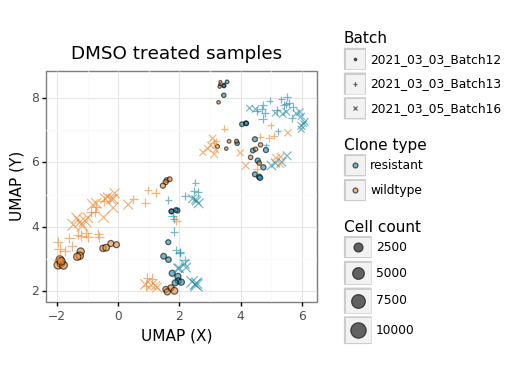

<ggplot: (8790523206692)>

In [9]:
dataset = "dmso_treated"

umap_resistant_type_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_batch", size="Metadata_cell_count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("DMSO treated samples")
    + gg.scale_shape_manual(name="Batch", values=[".", "+", "x"])
    + gg.scale_fill_manual(name="Clone type", values=["#1F8AA5", "#E98831"])
    + gg.scale_size_continuous(name="Cell count")
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", f"{dataset}_umap_resistant_type")

for extension in save_file_extensions:
    umap_resistant_type_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_resistant_type_gg

/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/dmso_treated_umap_clone_number.png
  warn('Filename: {}'.format(filename))


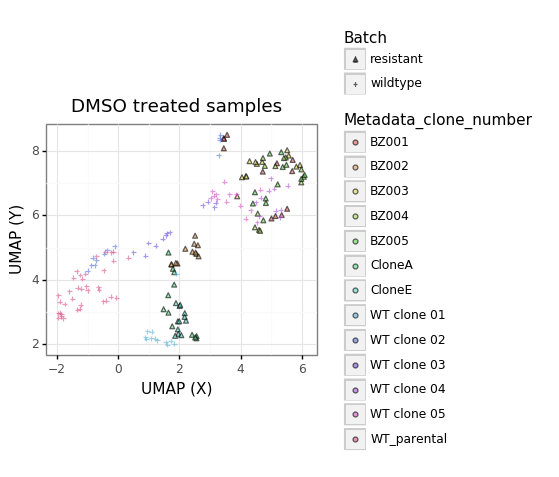

<ggplot: (-9223363246247404572)>

In [10]:
dataset = "dmso_treated"

umap_clone_number_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_number", shape="Metadata_clone_type"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("DMSO treated samples")
    + gg.scale_shape_manual(name="Batch", values=["^", "+"])
    #+ gg.scale_fill_manual(name="Clone type", values=["#1F8AA5", "#E98831"])
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", f"{dataset}_umap_clone_number")

for extension in save_file_extensions:
    umap_clone_number_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_clone_number_gg

/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/dmso_treated_umap_facet_clone_sample.png
  warn('Filename: {}'.format(filename))


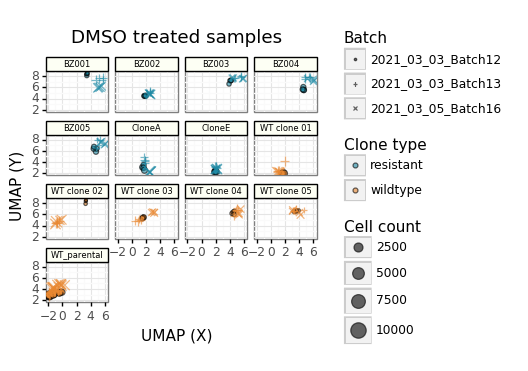

<ggplot: (-9223363246313060229)>

In [11]:
umap_clone_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_batch", size="Metadata_cell_count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("DMSO treated samples")
    + gg.scale_shape_manual(name="Batch", values=[".", "+", "x"])
    + gg.scale_fill_manual(name="Clone type", values=["#1F8AA5", "#E98831"])
    + gg.facet_wrap("~Metadata_clone_number")
    + gg.scale_size_continuous(name="Cell count")
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", f"{dataset}_umap_facet_clone_sample")

for extension in save_file_extensions:
    umap_clone_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_clone_gg

## Dataset with DMSO and Bortezomib treated together

In [12]:
dmso_plus_data_df = data_df.query("Metadata_batch in @dataset_d").reset_index(drop=True)

embedding_df = process_umap(dmso_plus_data_df)

print(embedding_df.shape)
embedding_df.head()

(660, 16)


,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,9.083535,12.283236,219905,B02,2021_03_03_Batch14,4269,2.5x10^3 cells/well,1.0,WT_parental,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,wildtype
1,4.642905,7.461285,219905,B03,2021_03_03_Batch14,1688,2.5x10^3 cells/well,2.0,CloneA,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,resistant
2,4.116130,7.306941,219905,B04,2021_03_03_Batch14,2238,2.5x10^3 cells/well,3.0,CloneE,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,resistant
3,1.438761,7.240111,219905,B05,2021_03_03_Batch14,3358,2.5x10^3 cells/well,4.0,WT clone 01,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,wildtype
4,8.321400,4.458195,219905,B06,2021_03_03_Batch14,291,2.5x10^3 cells/well,5.0,WT clone 02,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,wildtype


/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/dmso_treated_plus_umap_resistant_type.png
  warn('Filename: {}'.format(filename))


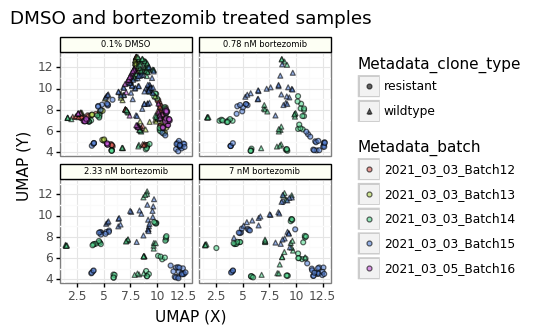

<ggplot: (8790582753116)>

In [13]:
dataset = "dmso_treated_plus"

umap_resistant_type_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(shape="Metadata_clone_type", fill="Metadata_batch"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("DMSO and bortezomib treated samples")
    + gg.facet_wrap("~Metadata_treatment")
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)

file = os.path.join("figures", "umap", f"{dataset}_umap_resistant_type")

for extension in save_file_extensions:
    umap_resistant_type_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_resistant_type_gg

## For Combined Batches of Four WT + Resistant Clones

In [14]:
fourclone_data_df = data_df.query("Metadata_batch in @dataset_b").reset_index(drop=True)

embedding_df = process_umap(fourclone_data_df)
embedding_df.head()

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,8.425729,8.043863,217760,B02,2019_11_20_Batch6,28210,NaN,NaN,BZ017,NaN,217760,NaN,0.1% DMSO,NaN,NaN,resistant
1,8.617327,8.898579,217760,B03,2019_11_20_Batch6,29215,NaN,NaN,WT002,NaN,217760,NaN,0.1% DMSO,NaN,NaN,wildtype
2,8.428866,8.997594,217760,B04,2019_11_20_Batch6,31138,NaN,NaN,WT008,NaN,217760,NaN,0.1% DMSO,NaN,NaN,wildtype
3,7.585599,5.281734,217760,B05,2019_11_20_Batch6,23325,NaN,NaN,WT009,NaN,217760,NaN,0.1% DMSO,NaN,NaN,wildtype
4,7.399487,7.819476,217760,B06,2019_11_20_Batch6,29598,NaN,NaN,BZ018,NaN,217760,NaN,0.1% DMSO,NaN,NaN,resistant


## Visualize a Series of UMAP Representations

/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_resistant_type.png
  warn('Filename: {}'.format(filename))


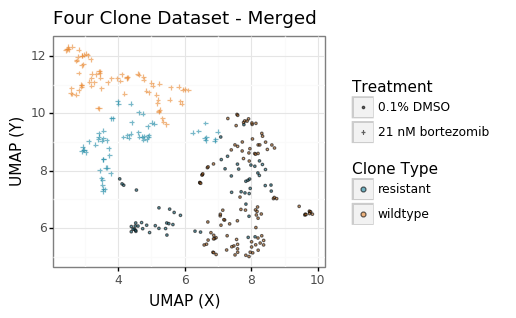

<ggplot: (8790583009032)>

In [15]:
umap_resistant_type_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_type", shape="Metadata_treatment"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_manual(name="Clone Type", values=["#1F8AA5", "#E98831"])
)

file = os.path.join("figures", "umap", "four_clone_umap_resistant_type")
for extension in save_file_extensions:
    umap_resistant_type_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_resistant_type_gg

/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_cell_count.png
  warn('Filename: {}'.format(filename))


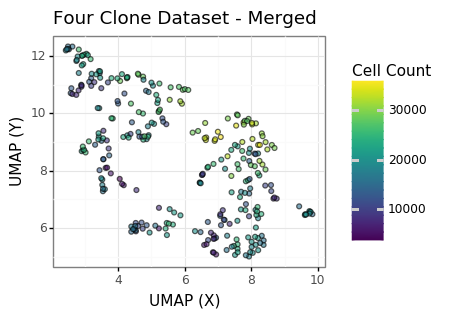

<ggplot: (-9223363246247432423)>

In [16]:
umap_cell_count_gg = (
    gg.ggplot(
        embedding_df.rename({"Metadata_cell_count": "Cell Count"}, axis="columns")
    )
    + gg.geom_point(
        gg.aes(x="x", y="y", fill="Cell Count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
)

file = os.path.join("figures", "umap", "four_clone_umap_cell_count")
for extension in save_file_extensions:
    umap_cell_count_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)
    
umap_cell_count_gg

/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_batch.png
  warn('Filename: {}'.format(filename))


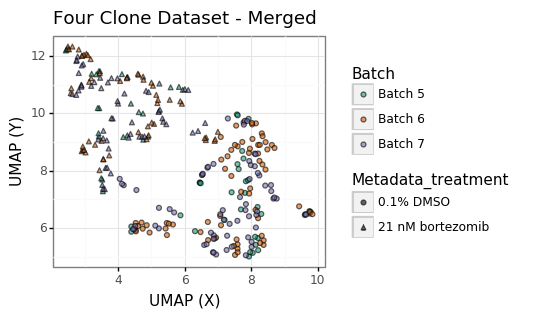

<ggplot: (-9223363246305900172)>

In [17]:
umap_batch_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_batch", shape="Metadata_treatment"),
        color='black',
        alpha=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.scale_fill_manual(
        name="Batch",
        values=["#1b9e77", "#d95f02", "#7570b3"],
        labels=['Batch 5', "Batch 6", "Batch 7"]
    )
)

file = os.path.join("figures", "umap", "four_clone_umap_batch")
for extension in save_file_extensions:
    umap_batch_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_batch_gg

/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 3.5 x 3 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_plate_facet.png
  warn('Filename: {}'.format(filename))


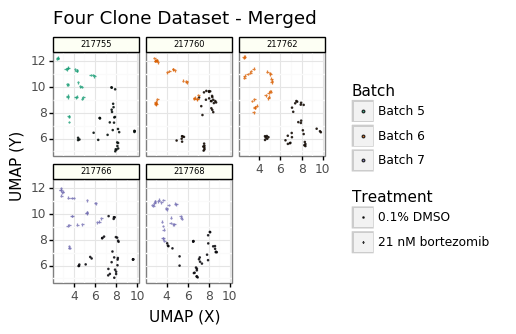

<ggplot: (8790607625280)>

In [18]:
umap_batch_facet_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
     + gg.geom_point(
        gg.aes(fill="Metadata_batch", shape="Metadata_treatment"),
        color='black',
        alpha=0.8,
        size=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.facet_wrap("~Metadata_Plate")
    + gg.scale_fill_manual(
        name="Batch",
        values=["#1b9e77", "#d95f02", "#7570b3"],
        labels=['Batch 5', "Batch 6", "Batch 7"]
    )
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.theme(
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4"),
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_plate_facet")
for extension in save_file_extensions:
    umap_batch_facet_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_batch_facet_gg

In [ ]:
# Visualize UMAP results
clone_facet_gg = (
    gg.ggplot(embedding_df, gg.aes('x', 'y'))
    + gg.geom_point(
        gg.aes(fill='factor(Metadata_Plate)', shape="Metadata_treatment"),
        alpha=0.6
    )
    + gg.theme_bw()
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_discrete(name="Plate")
    + gg.facet_wrap("~Metadata_clone_number")
    + gg.ggtitle("Four Clone Dataset - Merged")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_text=gg.element_text(size=6, color="black"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)
    
file = os.path.join("figures", "umap", "four_clone_umap_facet_clone_sample")
for extension in save_file_extensions:
    clone_facet_gg.save(filename='{}{}'.format(file, extension), height=4, width=4.5, dpi=400)

clone_facet_gg

/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 4.5 x 4 in image.
  from_inches(height, units), units))
/Users/yhan/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/four_clone_umap_facet_clone_sample.png
  warn('Filename: {}'.format(filename))


In [ ]:
umap_well_embedding_gg = (
    gg.ggplot(embedding_df, gg.aes(x="x", y="y"))
    + gg.geom_point(
        gg.aes(fill="Metadata_clone_number", shape="Metadata_treatment"),
        color='black', alpha=0.6
    )
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Treatment", values=[".", "+"])
    + gg.scale_fill_discrete(name="Clone")
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Four Clone Dataset - Merged")
)

file = os.path.join("figures", "umap", "four_clone_umap_clone_sample")
for extension in save_file_extensions:
    umap_well_embedding_gg.save(filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400)

umap_well_embedding_gg

## For Clone A and E Data

In [ ]:
# Load and process data
cloneAE_data_df = data_df.query("Metadata_batch in @dataset_a").reset_index(drop=True)

embedding_cloneAE_df = process_umap(cloneAE_data_df)
embedding_cloneAE_df.head()

In [ ]:
# Visualize UMAP results
clone_ae_umap_gg = (
    gg.ggplot(embedding_cloneAE_df)
    + gg.geom_point(
        gg.aes('x', 'y',
               shape="Metadata_Plate", 
               size='Metadata_treatment',
               color="Metadata_clone_number"),
        alpha=0.8
    )
    + gg.theme_bw()
    + gg.scale_shape_manual(name="Plate", values=[".", "+"])
    + gg.scale_color_discrete(name="Clone")
    + gg.scale_size_manual(name="Treatment", values=[1, 3, 5, 7])
    + gg.xlab("UMAP X")
    + gg.ylab("UMAP Y")
    + gg.ggtitle("Clone A and E - Merged")
    + gg.theme(
        legend_key=gg.element_rect(color="black", fill = "white"),
        strip_background=gg.element_rect(colour="black", fill="#fdfff4")
    )
)

file = os.path.join("figures", "umap", "cloneAE_umap")
for extension in save_file_extensions:
    clone_ae_umap_gg.save(
        filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400
    )

clone_ae_umap_gg

In [ ]:
clone_ae_umap_cell_count_gg = (
    gg.ggplot(
        embedding_cloneAE_df.rename({"Metadata_cell_count": "Cell Count"}, axis="columns")
    )
    + gg.geom_point(
        gg.aes(x="x", y="y", fill="Cell Count"),
        color='black', alpha=0.6)
    + gg.theme_bw()
    + gg.xlab("UMAP (X)")
    + gg.ylab("UMAP (Y)")
    + gg.ggtitle("Clone A and E - Merged")
)

file = os.path.join("figures", "umap", "cloneAE_umap_cell_count")
for extension in save_file_extensions:
    clone_ae_umap_cell_count_gg.save(
        filename='{}{}'.format(file, extension), height=3, width=3.5, dpi=400
    )
    
clone_ae_umap_cell_count_gg

## All Data

In [24]:
embedding_combined_df = process_umap(data_df)
embedding_combined_df.head()

,x,y,Metadata_Plate,Metadata_Well,Metadata_batch,Metadata_cell_count,Metadata_cell_density,Metadata_celltype_shorthand_from_plate_graph,Metadata_clone_number,Metadata_date,Metadata_plate_map_name,Metadata_time_to_adhere,Metadata_treatment,Metadata_treatment_shorthand_from_plate_graph,Metadata_treatment_time,Metadata_clone_type
0,3.499035,2.677029,219905,B02,2021_03_03_Batch14,4269,2.5x10^3 cells/well,1.0,WT_parental,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,wildtype
1,-0.343973,-2.561111,219905,B03,2021_03_03_Batch14,1688,2.5x10^3 cells/well,2.0,CloneA,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,resistant
2,-0.270238,-2.742825,219905,B04,2021_03_03_Batch14,2238,2.5x10^3 cells/well,3.0,CloneE,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,resistant
3,-0.646183,-4.591082,219905,B05,2021_03_03_Batch14,3358,2.5x10^3 cells/well,4.0,WT clone 01,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,wildtype
4,-2.397006,6.735993,219905,B06,2021_03_03_Batch14,291,2.5x10^3 cells/well,5.0,WT clone 02,20210219.0,219905,48 hr,2.33 nM bortezomib,2.0,4 hr,wildtype


/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:706: UserWarning: Saving 5.25 x 4 in image.
  from_inches(height, units), units))
/Users/gway/miniconda3/envs/resistance-mechanisms/lib/python3.7/site-packages/plotnine/ggplot.py:707: UserWarning: Filename: figures/umap/clone_compare_batch_effect.png
  warn('Filename: {}'.format(filename))


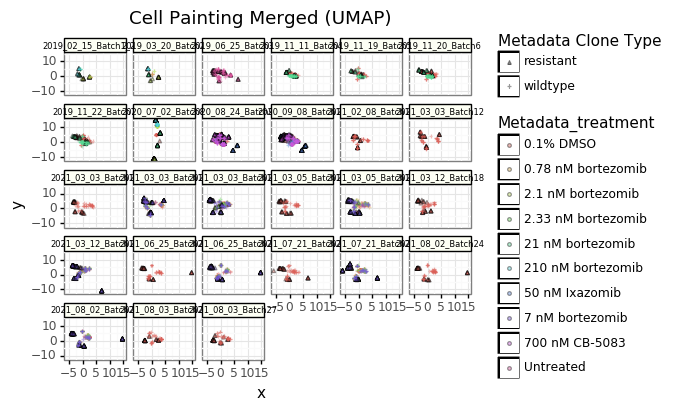

<ggplot: (8787719480289)>

In [25]:
# Visualize UMAP results
merged_umap_gg = (
    gg.ggplot(embedding_combined_df)
    + gg.geom_point(
        gg.aes(
            'x', 'y',
            fill="Metadata_treatment",
            shape='Metadata_clone_type'
        ),
        size=1,
        alpha=0.4
    )
    + gg.theme_bw()
    + gg.xlab("x")
    + gg.ylab("y")
    + gg.scale_shape_manual(name="Metadata Clone Type", values=["^", "+"])
    + gg.facet_wrap("~Metadata_batch")
    + gg.ggtitle("Cell Painting Merged (UMAP)")
    + gg.theme(
            legend_key=gg.element_rect(color="black", fill = "white"),
            strip_text=gg.element_text(size=6, color="black"),
            strip_background=gg.element_rect(colour="black", fill="#fdfff4")
        )
)

file = os.path.join("figures", "umap", "clone_compare_batch_effect")
for extension in save_file_extensions:
    merged_umap_gg.save(filename='{}{}'.format(file, extension), height=4, width=5.25, dpi=400)

merged_umap_gg